/Users/parthparakh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/Users/parthparakh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


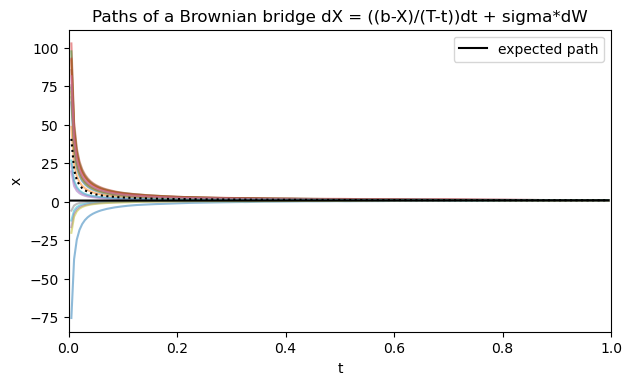

In [80]:
#!/usr/bin/python3
#Brownian_bridge_M2.ipynb
#Parth Parakh
#purpose: Simulate a Brownian bridge
#dX = (b-X)/(T-t)*dt + sigma*dW
#used in fixed rate bonds

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
t_t = np.array([np.arange(0,T,dt)]).transpose();
a = 0.8; b = 1; sigma = 0.3; #model parameters

# Compute the increments of an arithmetic Brownian motion (method 2)
dW = sigma*np.sqrt(dt)*np.random.randn(nsteps,npaths);
#Accumulate the increments (method 2)
W = np.zeros(nsteps*npaths).reshape(nsteps,npaths);

dW[0,:] = a;
W = np.cumsum(dW,axis=0);

v = b-W[-1,:];
v = np.tile(v,(nsteps,1));
tau = T*np.tile(t_t,(1,npaths));
# Compute the Brownian bridge: X(t) = W(t) + (b-W(T))/T*t (method 2)
X = W + v/tau;

# Compute the expected path
EX = a + (b-a)/T*t;

# Plot the expected, mean and sample paths
plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'k', label = 'expected path')
plt.plot(t,np.mean(X[:nsteps],axis=1),':k');
#sdevinfty = sigma*np.sqrt(mu/(2*alpha));
#plt.ylim(-0.02,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a Brownian bridge dX = ((b-X)/(T-t))dt + sigma*dW')
plt.show()